In [8]:
using ForwardDiff
using DifferentialEquations
using Plots

In [9]:
function f(x,u)
    return x + u
end

f (generic function with 1 method)

In [10]:
function g(x)
    return 0.1
end

g (generic function with 1 method)

In [11]:
function control(x,k)
    return -k * x
end

control (generic function with 1 method)

In [12]:
function closedLoop(x, k)
    return f(x, control(x,k))
end

closedLoop (generic function with 1 method)

In [13]:
function ode_f(state, params, t)
    return closedLoop(state, params[1])
end

ode_f (generic function with 1 method)

In [17]:
x0 = 0.5
tspan = (0.0,1.0)
prob = ODEProblem(ode_f,x0,tspan,[3.0])
sol = solve(prob,Tsit5(),reltol=1e-8, abstol=1e-8);

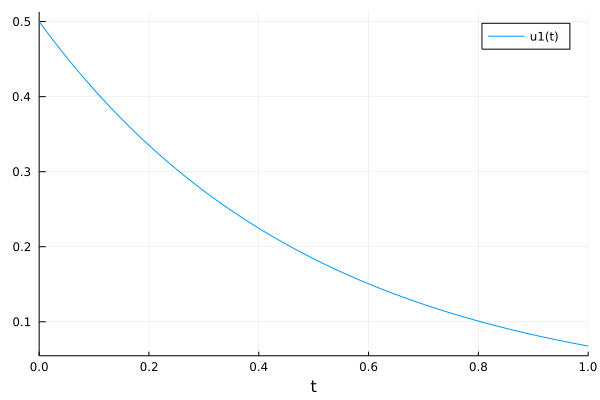

In [16]:
plot(sol)

In [18]:
function ode_g(state,params, time)
    return g(state)
end

ode_g (generic function with 1 method)

In [83]:
x0 = 0.5
tspan = (0.0,1.0)
prob = SDEProblem(ode_f, ode_g, x0, tspan, [3.0])
sol = solve(prob, EM(), dt=0.01);

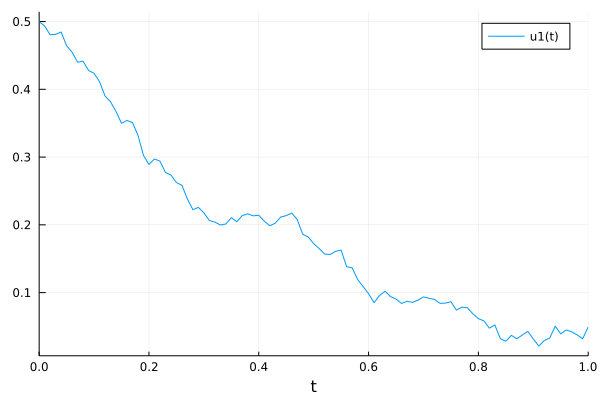

In [81]:
plot(sol)

In [84]:
ensembleprob = EnsembleProblem(prob)
@time sol = solve(ensembleprob, EnsembleThreads(), trajectories=1000);

  0.032241 seconds (72.95 k allocations: 17.043 MiB)


In [31]:
using DifferentialEquations.EnsembleAnalysis

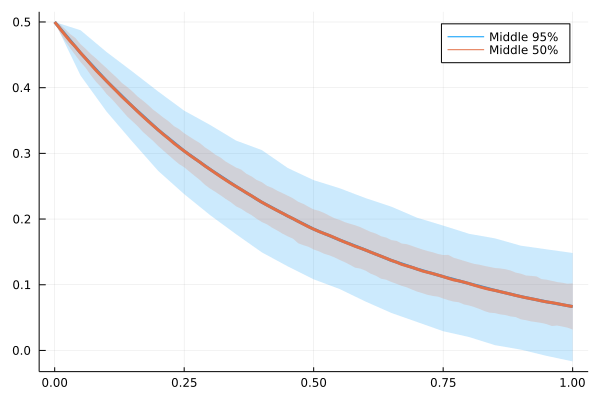

In [85]:
summ = EnsembleSummary(sol,0:0.05:1.0)
plot(summ,labels="Middle 95%")
summ = EnsembleSummary(sol, 0:0.01:1;quantiles=[0.25, 0.75])
plot!(summ,labels="Middle 50%",legend = true)

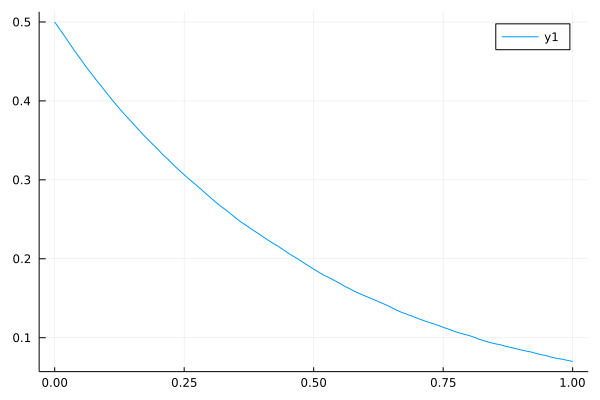

In [72]:
plot(summ.u)

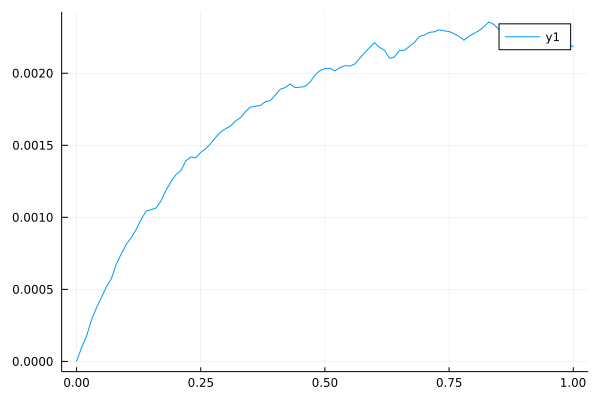

In [73]:
plot(summ.v)

In [96]:
sol.u[1].t;

In [90]:
function cost(sol)
    sol.u[end]^2
end

cost (generic function with 1 method)

In [97]:
function cost(k, x0)
    tspan = (0.0,1.0)
    prob = ODEProblem(ode_f,x0,tspan,[k])
    sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
    cost(sol)
end

cost (generic function with 2 methods)

In [98]:
cost(1,0.5)

0.25

In [99]:
function costSDE(k)
    x0 = 0.5
    tspan = (0.0,1.0)
    prob = SDEProblem(ode_f, ode_g, x0, tspan, [k])
    ensembleprob = EnsembleProblem(prob)
    sol = solve(ensembleprob,EnsembleThreads(),trajectories=1000)
    summ = EnsembleSummary(sol,0:0.01:1)
    return (summ.u[end])^2
end

costSDE (generic function with 1 method)

In [101]:
costSDE(1.0)

0.24394996557509305

In [102]:
costSDE(3.0)

0.004651885091752428

In [106]:
@time ForwardDiff.derivative(costSDE, 1.0)

  0.434625 seconds (5.53 M allocations: 143.867 MiB, 5.38% gc time)


-0.49966067150893345